<a href="https://colab.research.google.com/github/alisha-q/leukemia-detection-labs/blob/main/1_leukemia_detection_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf;

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/leukemia-classification")

print("Path to dataset files:", path)

100%|██████████| 867M/867M [00:39<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/leukemia-classification/versions/2


In [ ]:
import os
print(os.listdir(path))

['C-NMC_Leukemia']


In [ ]:
import os
inner_path = os.path.join(path, 'C-NMC_Leukemia')
print(os.listdir(inner_path))

['validation_data', 'testing_data', 'training_data']


In [ ]:
import os
train_path = os.path.join(path, 'C-NMC_Leukemia', 'training_data')
print(os.listdir(train_path))

['fold_1', 'fold_2', 'fold_0']


In [ ]:
import os
fold_path = os.path.join(path, 'C-NMC_Leukemia', 'training_data', 'fold_0')
print(os.listdir(fold_path))

['hem', 'all']


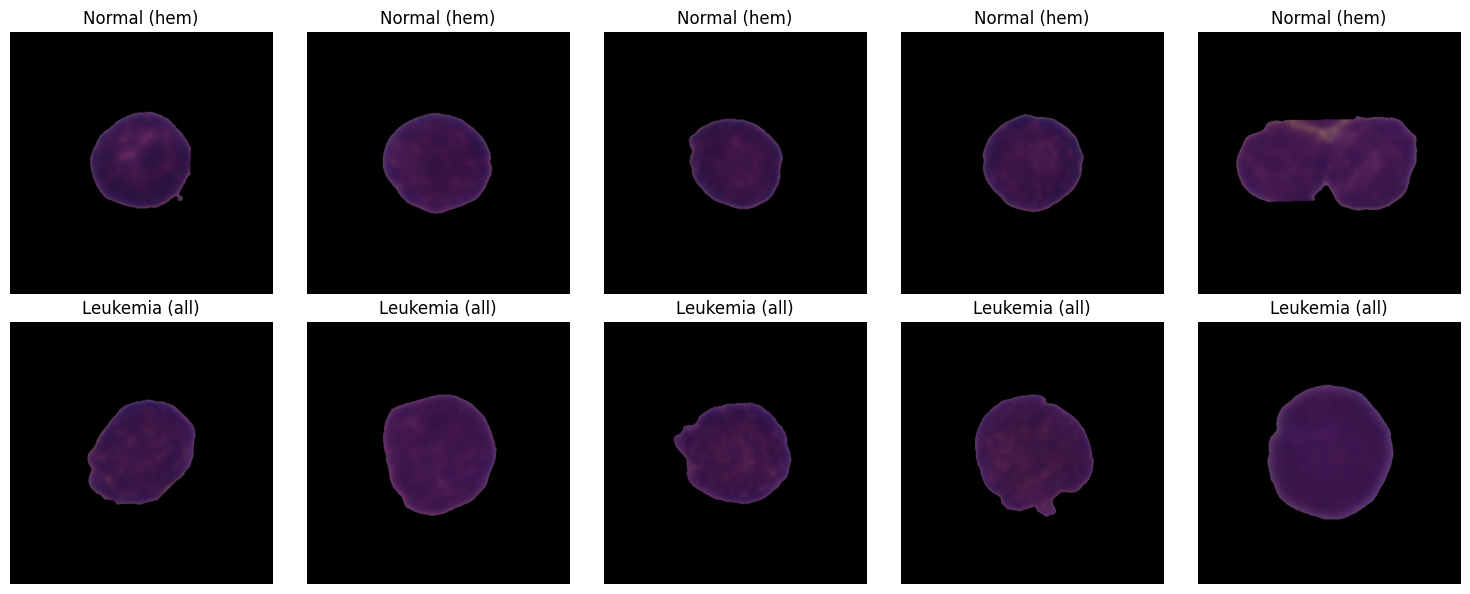

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths
fold_path = os.path.join(path, 'C-NMC_Leukemia', 'training_data', 'fold_0')
normal_folder = os.path.join(fold_path, 'hem')
leukemia_folder = os.path.join(fold_path, 'all')

# Get image files
normal_images = os.listdir(normal_folder)[:5]
leukemia_images = os.listdir(leukemia_folder)[:5]

# Display
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Normal cells
    img = Image.open(os.path.join(normal_folder, normal_images[i]))
    axes[0, i].imshow(img)
    axes[0, i].set_title('Normal (hem)')
    axes[0, i].axis('off')

    # Leukemia cells
    img = Image.open(os.path.join(leukemia_folder, leukemia_images[i]))
    axes[1, i].imshow(img)
    axes[1, i].set_title('Leukemia (all)')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Normal: {len(os.listdir(normal_folder))} images")
print(f"Leukemia: {len(os.listdir(leukemia_folder))} images")

Normal: 1130 images
Leukemia: 2397 images


In [ ]:
# Count images in all folds
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(path, 'C-NMC_Leukemia', 'training_data', fold)
    normal = len(os.listdir(os.path.join(fold_path, 'hem')))
    leukemia = len(os.listdir(os.path.join(fold_path, 'all')))
    print(f"{fold}: Normal={normal}, Leukemia={leukemia}")

fold_0: Normal=1130, Leukemia=2397
fold_1: Normal=1163, Leukemia=2418
fold_2: Normal=1096, Leukemia=2457
